In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

Перейдем к практике! Представьте, что вы аналитик в сервисе такси. Ваша задача – написать функцию haversine для подсчета расстояния между пунктами отправления и прибытия и, используя  pd.iterrows(), создать колонку distance с подсчитанным расстоянием. Более подробно ознакомиться с формулой можно здесь.

In [2]:
def haversine(p_long, p_lat, d_long, d_lat, r=6371):
    p_long = np.radians(p_long)
    p_lat = np.radians(p_lat)
    d_long = np.radians(d_long)
    d_lat = np.radians(d_lat)
    lat_diff = d_lat - p_lat
    long_diff = d_long - p_long
    
    skobka = np.sin(lat_diff/2.0) ** 2 + np.cos(p_lat) * np.cos (d_lat) * np.sin(long_diff/2.0) ** 2
    pred = 2 * np.arcsin(np.sqrt(skobka))
    d = pred * r
    return (d)

In [89]:
haversine (-73.844311,40.721319,-73.841610,40.712278)

1.030763935049508

In [12]:
nyc = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-p-rudenko/1_Python/Lesson_8/train.csv')

In [3]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [42]:
df.iterrows()


<generator object DataFrame.iterrows at 0x7fabdef5a2a0>

In [44]:
for index, row in df[:2].iterrows():
    print("Индекс: {},\nСодержимое строки:\n{}\n".format(index, row))

Индекс: 0,
Содержимое строки:
key                  2009-06-15 17:26:21.0000001
fare_amount                                  4.5
pickup_datetime          2009-06-15 17:26:21 UTC
pickup_longitude                        -73.8443
pickup_latitude                          40.7213
dropoff_longitude                       -73.8416
dropoff_latitude                         40.7123
passenger_count                                1
Name: 0, dtype: object

Индекс: 1,
Содержимое строки:
key                  2010-01-05 16:52:16.0000002
fare_amount                                 16.9
pickup_datetime          2010-01-05 16:52:16 UTC
pickup_longitude                         -74.016
pickup_latitude                          40.7113
dropoff_longitude                       -73.9793
dropoff_latitude                          40.782
passenger_count                                1
Name: 1, dtype: object



In [4]:
#%%time
#Wall time: 7.27 s
dists = []
for i, row in df.iterrows():
    dists.append(haversine(row.pickup_longitude,row.pickup_latitude, row.dropoff_longitude, row.dropoff_latitude))
df['distance'] = dists

In [48]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
...,...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,4.940374
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.874706
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,2.263286
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.665245


На первый взгляд, pd.iterrows() хорошо справляется со своей задачей и выполнение операции не занимает много времени. 

Давайте попробуем еще один метод, pd.itertuples, который на каждой итерации возвращает именованный кортеж (named tuple) для каждой строки датафрейма. Параметр index по умолчанию равен True, поэтому первым элементом кортежа следует индекс, далее — содержимое строки. 

In [49]:
for row in df[:1].itertuples(name='ride'):  # исп. "ride" как название
    print(f"Тип содержимого: {type(row)}")

Тип содержимого: <class 'pandas.core.frame.ride'>


In [50]:
for row in df[:3].itertuples(name='custom_name'):
    print(row)

custom_name(Index=0, key='2009-06-15 17:26:21.0000001', fare_amount=4.5, pickup_datetime='2009-06-15 17:26:21 UTC', pickup_longitude=-73.844311, pickup_latitude=40.721319, dropoff_longitude=-73.84161, dropoff_latitude=40.71227800000001, passenger_count=1, distance=1.0307639350481281)
custom_name(Index=1, key='2010-01-05 16:52:16.0000002', fare_amount=16.9, pickup_datetime='2010-01-05 16:52:16 UTC', pickup_longitude=-74.016048, pickup_latitude=40.711303, dropoff_longitude=-73.979268, dropoff_latitude=40.782004, passenger_count=1, distance=8.450133595805992)
custom_name(Index=2, key='2011-08-18 00:35:00.00000049', fare_amount=5.7, pickup_datetime='2011-08-18 00:35:00 UTC', pickup_longitude=-73.982738, pickup_latitude=40.76127, dropoff_longitude=-73.991242, dropoff_latitude=40.750562, passenger_count=2, distance=1.3895252257697308)


In [52]:
for row in df[:3].itertuples():
    print("Индекс {}; Число пассажиров: {}".format(row.Index, row.passenger_count))

Индекс 0; Число пассажиров: 1
Индекс 1; Число пассажиров: 1
Индекс 2; Число пассажиров: 2


In [5]:
%%time
#Wall time: 9.21 s
df['distance'] = pd.Series((haversine(row.pickup_longitude,row.pickup_latitude, row.dropoff_longitude, row.dropoff_latitude) for row in df.itertuples()))


CPU times: user 821 ms, sys: 0 ns, total: 821 ms
Wall time: 817 ms


Еще один часто используемый метод pd.apply() применяет заданную функцию вдоль определенной оси (axis=0 – строки; axis=1 – столбцы), и является более эффективным способом, чем pd.iterrows() за счет использования внутренних оптимизаций в pandas. Тем не менее, все равно подразумевает итерацию по всем рядам.

df['distance'] = df[['col1', 'col2', 'col3', 'col4']].apply(lambda row: haversine(row[0], row[1], row[2], row[3]), axis=1)


В столбец distance датафрейма nyc сохраните результат подсчета расстояния между точками отправки и прибытия, используя написанную ранее функцию. В переменную longest сохраните самое большое расстояние. Не забудьте проверить скорость выполнения операции (в код включать не нужно)! 

In [6]:
df['distance'] = df.apply(lambda x: haversine(x['pickup_longitude'], x['pickup_latitude'], x['dropoff_longitude'], x['dropoff_latitude']),axis = 1)

In [79]:
longest = df.distance.max()

In [80]:
longest

8667.818812217458

В целом, itertuples — это именно то, что нам нужно! Но есть пара моментов.

Оказывается, в нашем случае itertuples — не предел. На всех предыдущих шагах мы использовали циклы, что не очень хорошо. Почему же?

Базовые объекты в pandas — Series и DataFrame, которые представляют собой одномерные и двумерные массивы (arrays) соответственно. Так, векторизация — процесс выполнения операций над массивами. В pandas есть довольно большой набор векторизованных функций, и их использование во многих случаях предпочтительнее обычных циклов, поскольку они предназначены для работы именно с Series. К таким функциям относятся, например, sum и agg. С помощью векторизации можно получить ещё большее ускорение, значительно уменьшив количество итераций. Иными словами, действия будут происходят сразу над всей серией, а не над каждым элементом по отдельности.
Изменения в коде весьма незначительны: передаем функции на вход необходимые колонки, и получается магия!

df['distance'] = haversine(df['col1'], df['col2'], df['col3'], df['col4'])

Убедимся, что векторизованные операции работают намного быстрее. Создайте функцию для подсчета расстояния haversine, описанную в первом шаге, и примените её к датасету nyc. Результат сохраните в колонку distance. 

In [7]:
df['distance'] = haversine(df.pickup_longitude,
                             df.pickup_latitude,
                             df.dropoff_longitude,
                             df.dropoff_latitude)

In [8]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
...,...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,4.940374
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,0.874706
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,2.263286
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,0.665245


В предыдущем шаге мы передавали функции колонки формата Series, с чем связаны дополнительные вычислительные затраты, например, индексирование и проверка типа данных. Чтобы этого избежать, в качестве аргументов функции можно передать всё те же необходимые колонки, дополнительно указав .values, чтобы из Series получить массив NumPy (numpy array). В таком случае действия будут выполняться непосредственно над ndarrays. Такой способ можно использовать, когда отсутствие индексов и пр. не приведет к нарушению работы применяемой функции. 

In [14]:
nyc['distance'] = haversine(df.pickup_longitude.values,
                             df.pickup_latitude.values,
                             df.dropoff_longitude.values,
                             df.dropoff_latitude.values)

In [13]:
nyc.pickup_longitude.values

array([-73.844311, -74.016048, -73.982738, ..., -74.002698, -73.946062,
       -73.932603])

Как вы уже заметили, произошло что-то странное: в качестве широты и долготы стоят нулевые значения, а расстояние — целых 8667 км! Неужели наш пассажир действительно уехал так далеко?

Посмотрите, есть ли еще кейсы, где в качестве хотя бы одной из координат пункта назначения стоят нули, и в качестве ответа укажите количество таких случаев.

In [25]:
nyc[(nyc.dropoff_longitude == 0) | (nyc.dropoff_latitude == 0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
11,2012-12-24 11:24:00.00000098,5.5,2012-12-24 11:24:00 UTC,0.0,0.0,0.0,0.0,3,0.0
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00 UTC,0.0,0.0,0.0,0.0,1,0.0
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00 UTC,0.0,0.0,0.0,0.0,1,0.0
124,2013-01-17 17:22:00.00000043,8.0,2013-01-17 17:22:00 UTC,0.0,0.0,0.0,0.0,2,0.0
192,2010-09-05 17:08:00.00000092,3.7,2010-09-05 17:08:00 UTC,0.0,0.0,0.0,0.0,5,0.0
...,...,...,...,...,...,...,...,...,...
49625,2012-01-09 19:50:27.0000001,12.1,2012-01-09 19:50:27 UTC,0.0,0.0,0.0,0.0,1,0.0
49816,2012-02-20 00:54:00.000000100,4.9,2012-02-20 00:54:00 UTC,0.0,0.0,0.0,0.0,1,0.0
49845,2009-03-02 21:57:15.0000001,6.6,2009-03-02 21:57:15 UTC,0.0,0.0,0.0,0.0,3,0.0
49856,2010-04-19 17:25:00.000000170,10.9,2010-04-19 17:25:00 UTC,0.0,0.0,0.0,0.0,5,0.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/tljh/user/lib/python3.7/site-

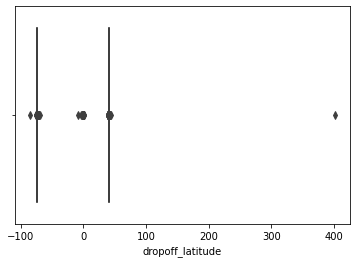

In [33]:
sns.boxplot(nyc.pickup_longitude)
sns.boxplot(nyc.pickup_latitude)
sns.boxplot(nyc.dropoff_longitude)
sns.boxplot(nyc.dropoff_latitude)

Критерии для фильтрации выбраны, остался последний шаг: отфильтровать имеющиеся данные и наконец-то найти самую дальнюю поездку.

Для фильтрации используйте условия из предыдущего степа, а также добавьте еще одно ограничение для переменной distance. Предположим, максимальная удаленность пунктов друг от друга не должна превышать 50 километров, иначе такой заказ не будет принят системой, а наличие подобных результатов в таблице будет считаться ошибкой.

В качестве ответа укажите сумму, которую заплатил пассажир, проехавший наибольшее расстояние.

In [48]:
nyc.query("distance <= 50").sort_values('distance',ascending = False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
33502,2014-02-22 02:44:00.00000052,136.00,2014-02-22 02:44:00 UTC,-73.989540,40.757032,-73.860580,41.147487,1,44.746988
12349,2010-05-01 15:23:00.00000097,104.67,2010-05-01 15:23:00 UTC,-73.797225,40.639720,-73.840545,41.030892,1,43.648755
649,2009-09-19 10:34:41.0000002,66.30,2009-09-19 10:34:41 UTC,-74.438233,40.993260,-74.185996,40.693874,2,39.476975
6308,2010-08-23 11:06:00.000000121,45.00,2010-08-23 11:06:00 UTC,-73.422692,40.747012,-73.870317,40.773160,1,37.812945
5686,2011-07-30 11:15:00.00000082,3.30,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1,33.850093
...,...,...,...,...,...,...,...,...,...
42586,2012-06-30 15:21:00.000000130,3.70,2012-06-30 15:21:00 UTC,-73.988992,40.737285,-73.988992,40.737285,1,0.000000
12036,2010-07-23 13:09:34.0000002,20.50,2010-07-23 13:09:34 UTC,0.000000,0.000000,0.000000,0.000000,1,0.000000
31700,2010-10-31 20:26:12.0000001,6.90,2010-10-31 20:26:12 UTC,0.000000,0.000000,0.000000,0.000000,2,0.000000
31705,2011-09-14 06:25:00.00000089,4.90,2011-09-14 06:25:00 UTC,0.000000,0.000000,0.000000,0.000000,1,0.000000


In [47]:
nyc.sort_values('distance',ascending = False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
48996,2012-05-12 10:48:00.00000020,49.8,2012-05-12 10:48:00 UTC,-74.014917,40.713382,0.000000,0.000000,1,8667.818812
31823,2013-11-26 18:12:00.000000179,52.0,2013-11-26 18:12:00 UTC,-74.005490,40.739532,0.000000,0.000000,1,8667.572331
9147,2014-07-14 21:37:29.0000002,8.5,2014-07-14 21:37:29 UTC,0.000000,0.000000,-74.002037,40.752035,1,8667.542104
37798,2013-08-28 12:11:00.00000087,22.5,2013-08-28 12:11:00 UTC,-74.004465,40.741823,0.000000,0.000000,1,8667.534293
8647,2014-03-27 18:01:00.00000071,21.5,2014-03-27 18:01:00 UTC,-74.001808,40.750782,0.000000,0.000000,1,8667.497512
...,...,...,...,...,...,...,...,...,...
10017,2011-04-12 13:57:00.00000035,13.7,2011-04-12 13:57:00 UTC,-73.994422,40.720175,-73.994422,40.720175,1,0.000000
10085,2013-10-01 07:28:54.0000007,13.5,2013-10-01 07:28:54 UTC,0.000000,0.000000,0.000000,0.000000,1,0.000000
30658,2010-02-24 08:08:00.00000071,8.1,2010-02-24 08:08:00 UTC,0.000000,0.000000,0.000000,0.000000,1,0.000000
10162,2012-03-25 17:16:00.00000021,6.5,2012-03-25 17:16:00 UTC,0.000000,0.000000,0.000000,0.000000,3,0.000000
